2.2 Time plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_csv('../Data/yaoko00006/yaoko00006.csv')

df['Date'] = pd.to_datetime(df['time'], unit='ms')

df.set_index('Date', inplace=True)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.isocalendar().week  
df['DayOfWeek'] = df.index.dayofweek
df['Day'] = df.index.day
df['Hour'] = df.index.hour 


Weekly plot


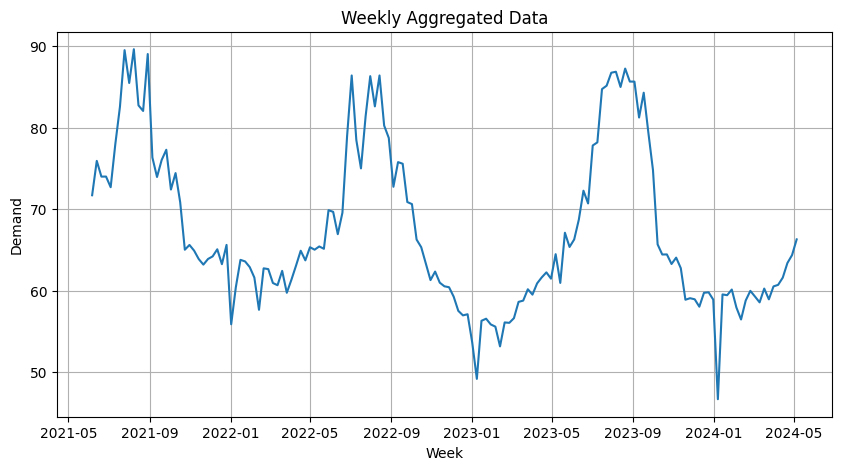

In [2]:
weekly_data = df['demand'].resample('W').mean()

plt.figure(figsize=(10, 5))
plt.plot(weekly_data.index, weekly_data)
plt.title('Weekly Aggregated Data')
plt.xlabel('Week')
plt.ylabel('Demand')
plt.grid(True)
plt.show()

**Trend**  

     A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend. There is a trend in the antidiabetic drug sales data shown in Figure 2.2.

**Seasonal**  

     A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known period.

**Cyclic**  

     A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years

**Seansonal Plot**

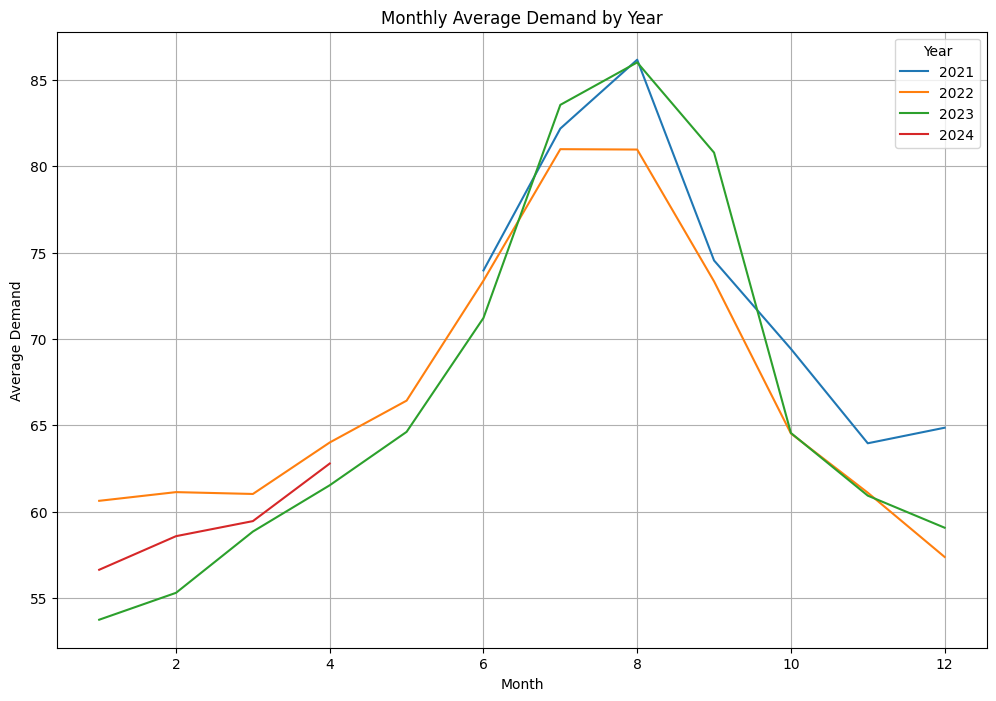

In [3]:


# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))
for year in df['Year'].unique():
    # Extract data for one year
    yearly_data = df[df['Year'] == year]
    
    # Group by month and take the mean of the 'demand', if another aggregation is needed adjust accordingly
    monthly_avg = yearly_data.groupby('Month')['demand'].mean()
    
    # Plot
    plt.plot(monthly_avg.index, monthly_avg, label=str(year))

plt.title('Monthly Average Demand by Year')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.legend(title='Year')
plt.grid(True)



plt.show()

**Multiple seasonal periods**

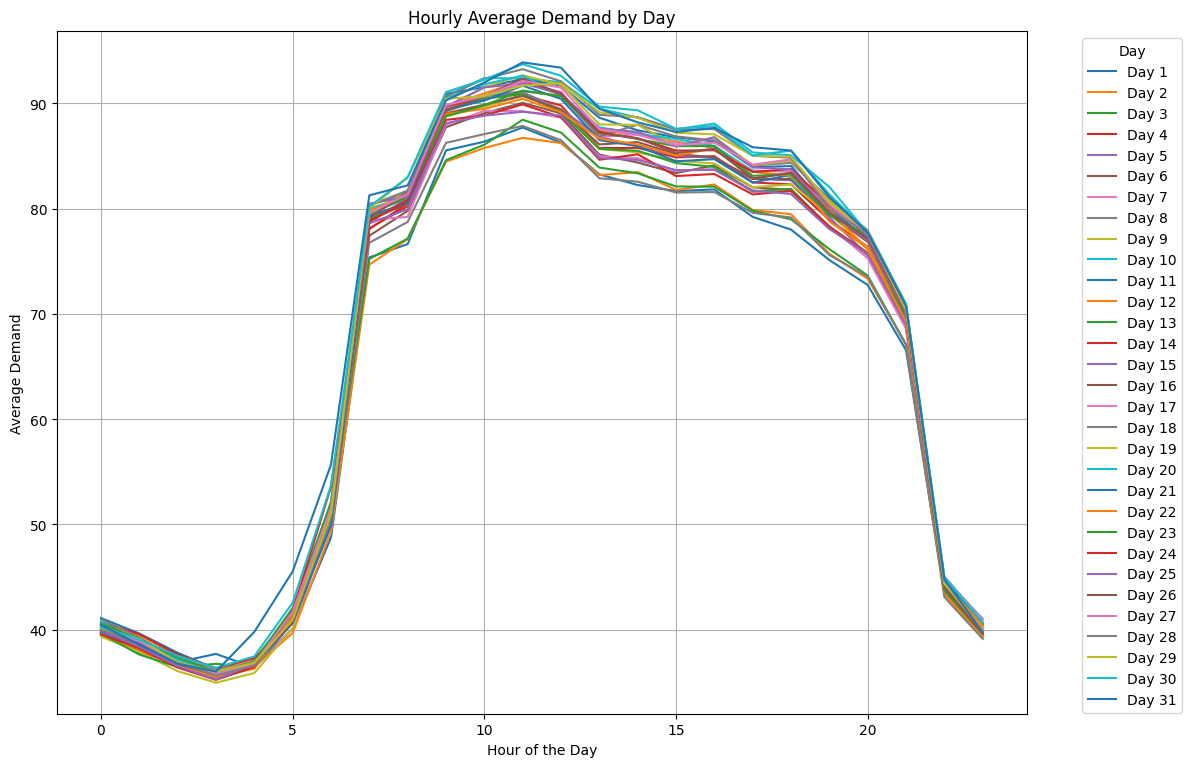

In [4]:
df['Day'] = df.index.day
df['Hour'] = df.index.hour

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))

# Example: Plot hourly data for a specific day
for day in df['Day'].unique():
    # Extract data for one day
    daily_data = df[df['Day'] == day]
    
    # Group by hour and take the mean of the 'demand'
    hourly_avg = daily_data.groupby('Hour')['demand'].mean()
    
    # Plot
    plt.plot(hourly_avg.index, hourly_avg, label=f'Day {day}')


plt.title('Hourly Average Demand by Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Demand')
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

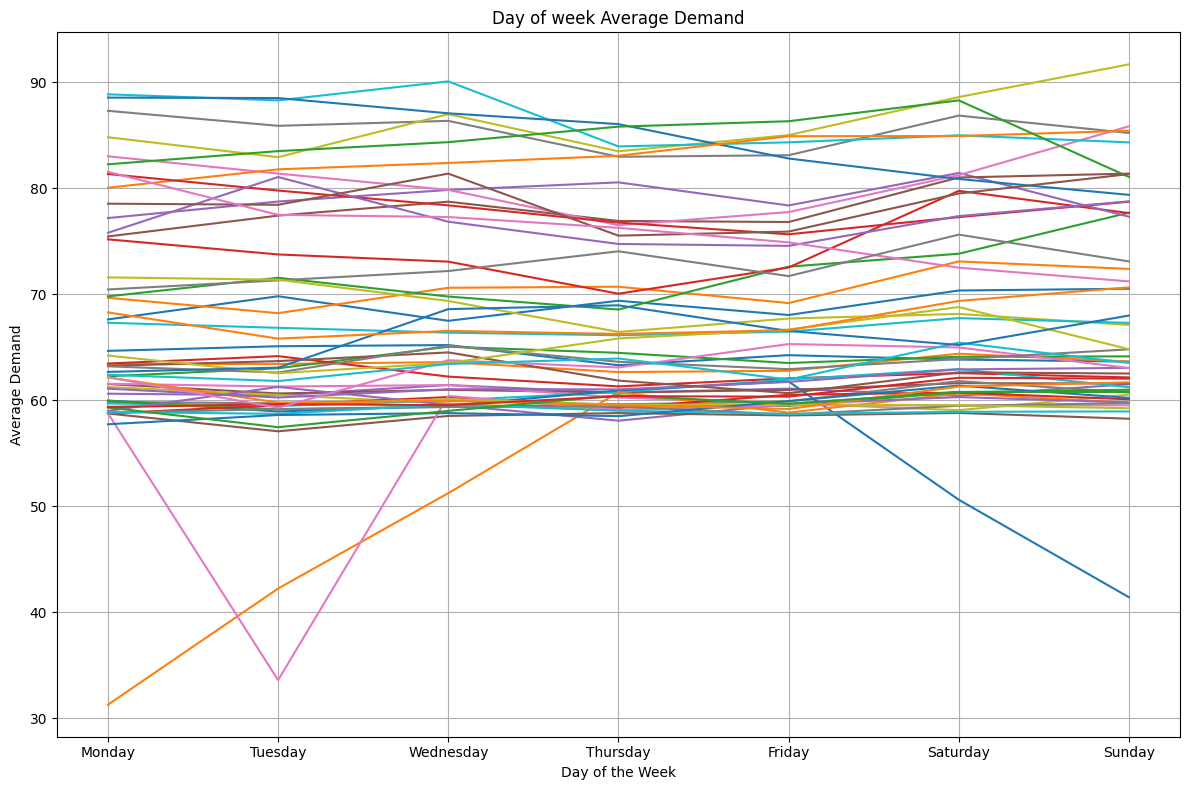

In [5]:
import matplotlib.pyplot as plt

# Dictionary to map day numbers to day names
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Replace numeric days with names in the DataFrame
df['DayOfWeek'] = df['DayOfWeek'].map(day_map)

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))

# Example: Plot hourly data for a specific day
for week in df['Week'].unique():
    # Extract data for one month
    weekly_data = df[df['Week'] == week]
    
    # Group by day name and take the mean of 'demand'
    date_avg = weekly_data.groupby('DayOfWeek')['demand'].mean()
    
    # Order days by the weekday to maintain the correct order in the plot
    ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    date_avg = date_avg.reindex(ordered_days)
    plt.plot(date_avg.index, date_avg)

plt.title('Day of week Average Demand')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand')
# plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


**Seasonal subseries plots**

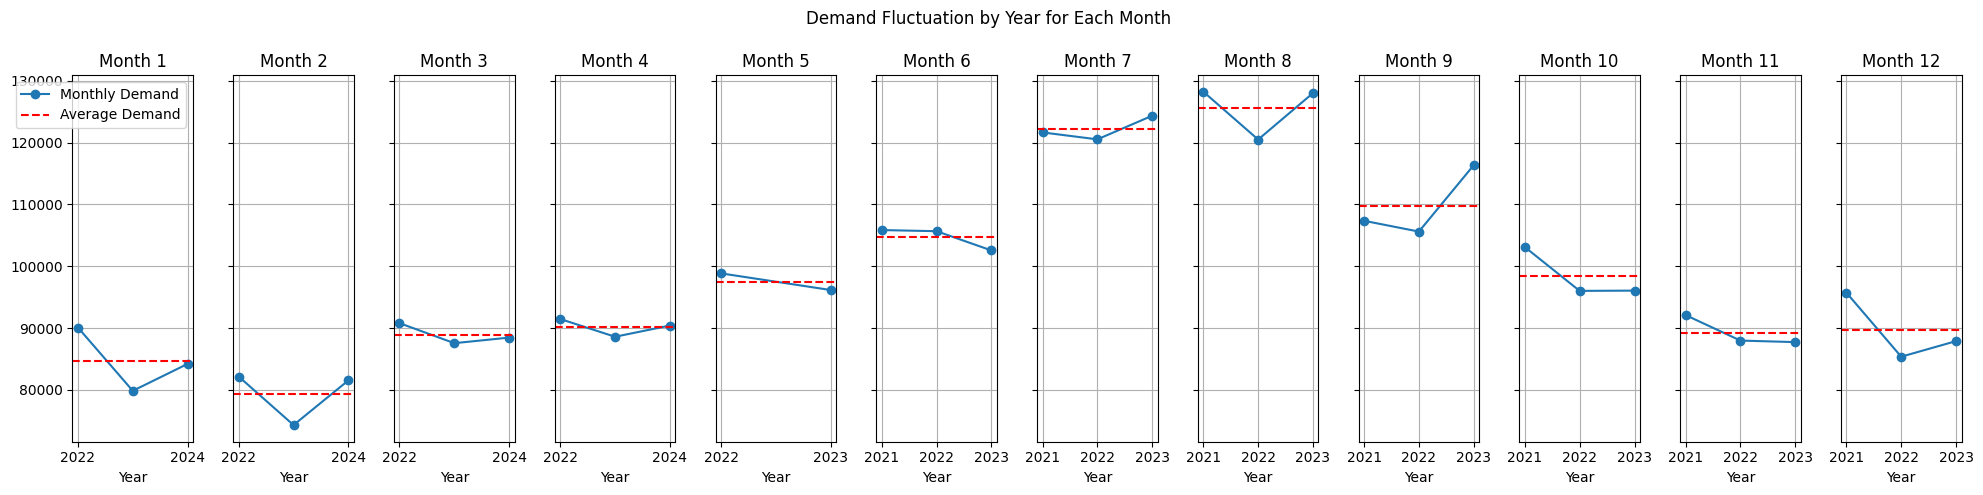

In [8]:
# Set up the plot for each month
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(20, 5), sharey=True)  # Share y-axis across subplots
fig.suptitle('Demand Fluctuation by Year for Each Month')

months = df['Month'].unique()
months.sort()  # Ensuring months are in order

for i, month in enumerate(months):
    # Filter data for the specific month and group by year
    monthly_data = df[df['Month'] == month].groupby('Year')['demand'].sum()
    
    # Calculate the mean demand for the month across all years
    mean_demand = monthly_data.mean()
    
    # Plotting the demand by year for the specific month in its subplot
    axes[i].plot(monthly_data.index, monthly_data, marker='o', label='Monthly Demand')
    axes[i].axhline(y=mean_demand, color='r', linestyle='--', label='Average Demand')
    axes[i].set_title(f'Month {month}')
    axes[i].set_xlabel('Year')
    axes[i].grid(True)

    # Add legend to the first subplot only to avoid redundancy
    if i == 0:
        axes[i].legend()

# Adjust the layout so the plots are not overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top margin to accommodate the suptitle
plt.show()

**Scatter Plot**

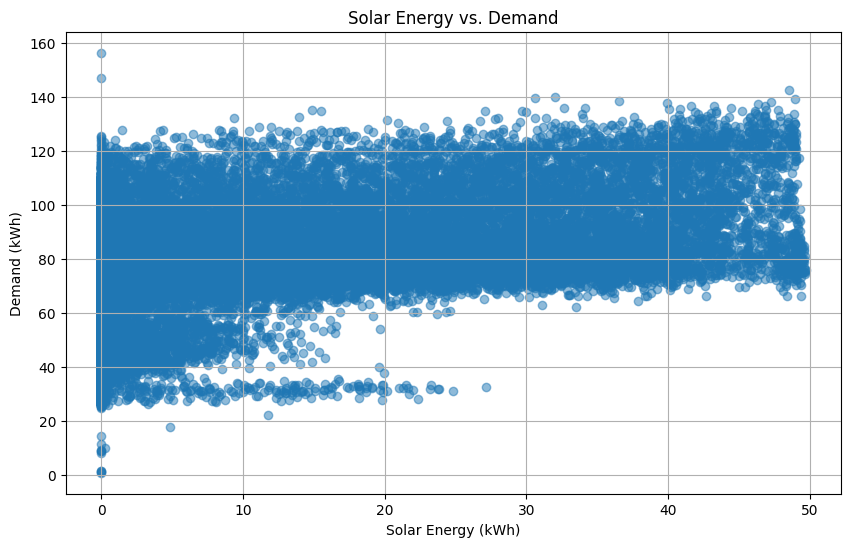

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['solar'], df['demand'], alpha=0.5)  # alpha is set to 0.5 for better visibility of data points overlap
plt.title('Solar Energy vs. Demand')
plt.xlabel('Solar Energy (kWh)')
plt.ylabel('Demand (kWh)')
plt.grid(True)
plt.show()


**Correlation**  

The correlation coefficient only measures the strength of the linear relationship between two variables, and can sometimes be misleading.

**Scatterplot matrices**

**Lag Plot**


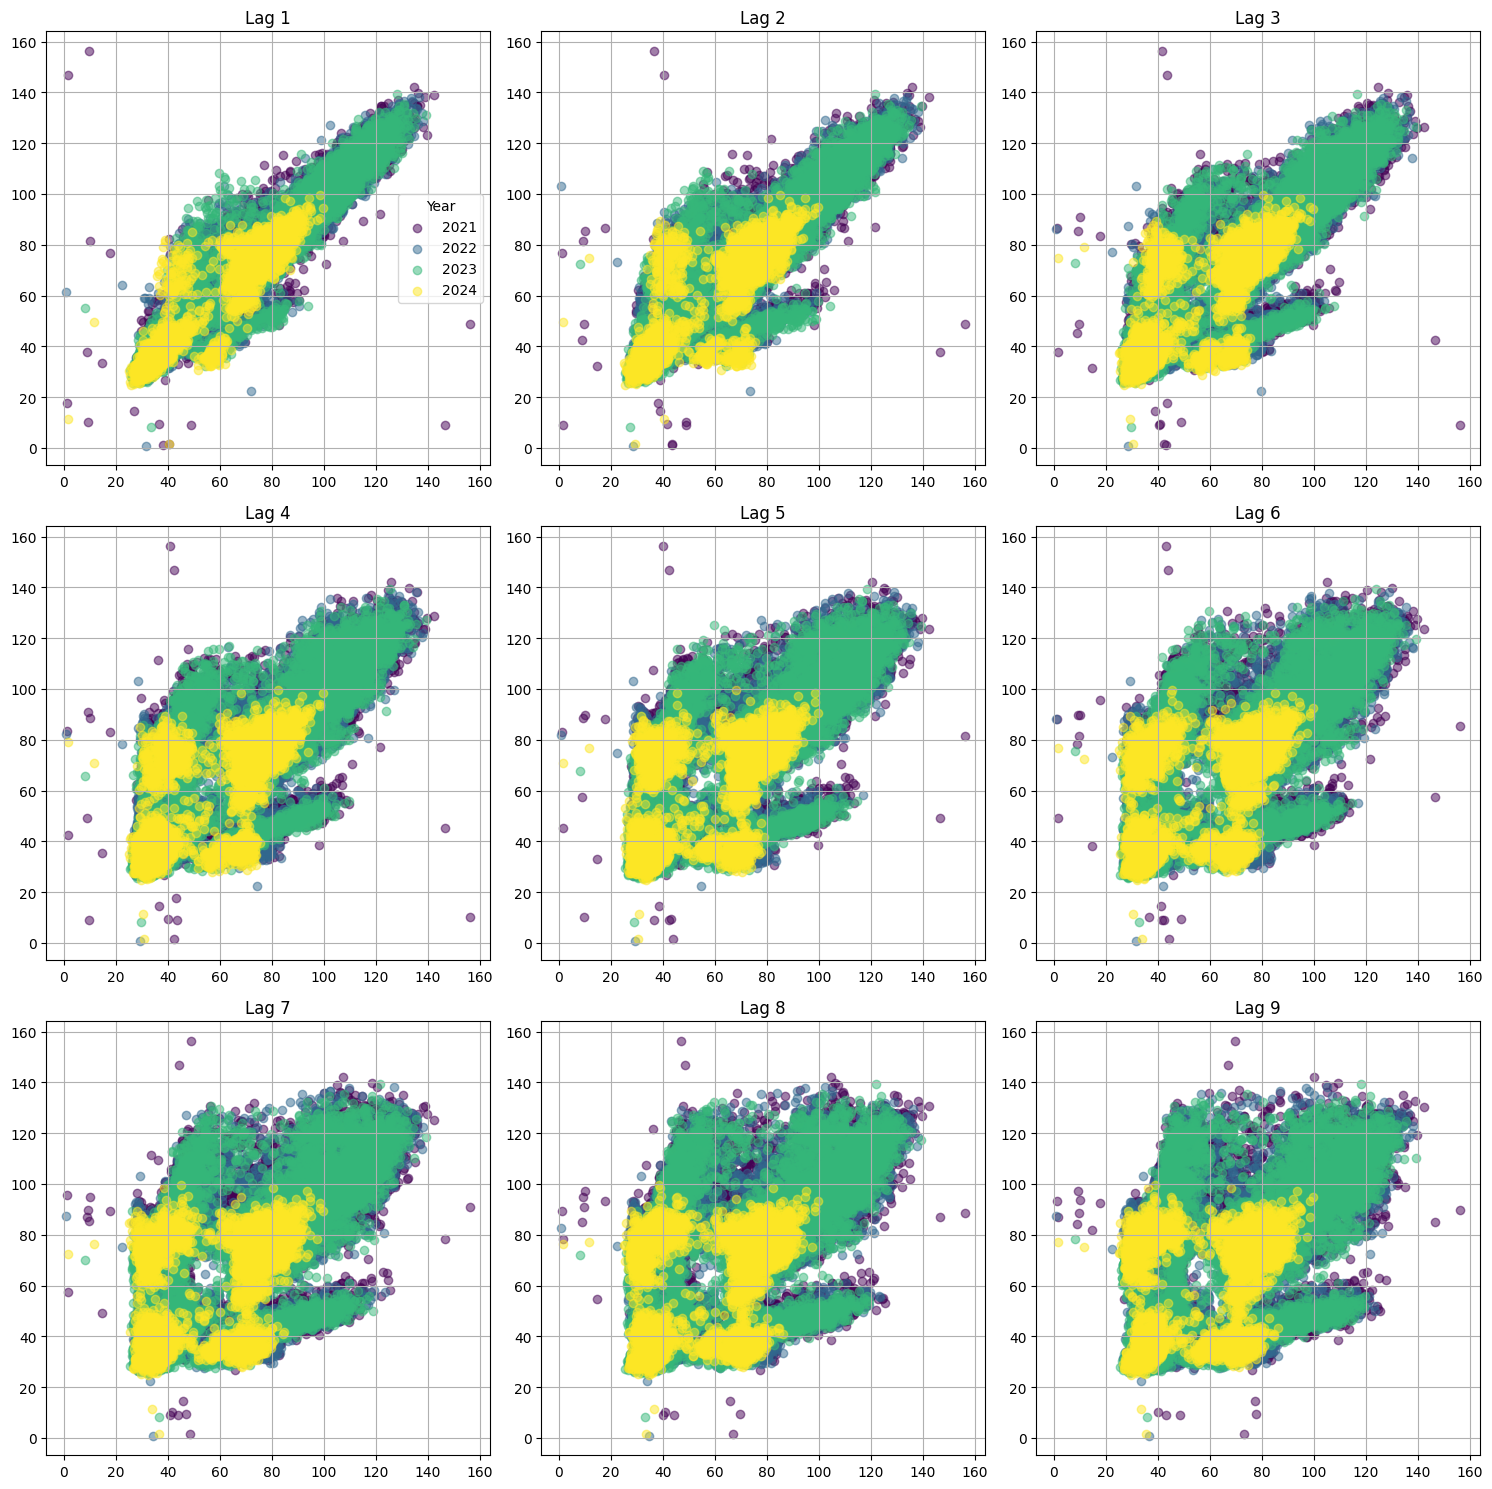

In [14]:
from pandas.plotting import lag_plot
import numpy as np
# Set up the plot for each lag
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to simplify accessing them in the loop

# Unique years for coloring
years = df['Year'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))  # Generate a color map
year_color = {year: color for year, color in zip(years, colors)}  # Map years to colors

# Plotting custom lag plots for lags from 1 to 9
for i in range(9):
    lag = i + 1
    for year in years:
        # Filter the data by year and create lagged data
        yearly_data = df[df['Year'] == year]
        x = yearly_data['demand'].iloc[:-lag]  # Values at t
        y = yearly_data['demand'].iloc[lag:]  # Values at t+lag
        axes[i].scatter(x, y, alpha=0.5, color=year_color[year], label=str(year) if i == 0 else "_nolegend_")

    axes[i].set_title(f'Lag {lag}')
    axes[i].grid(True)
    if i == 0:
        axes[i].legend(title='Year')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

**Autocorrelation**

**White noise**  

For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation. For a white noise series, we expect 95% of the spikes in the ACF to lie within $\pm1.96 / sqrt(T)$ where $T$ is the length of the time series.